In [83]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV
from sklearn.metrics import fbeta_score
from sklearn import linear_model

In [84]:
cancerFrame = pd.read_csv("../DataSet/CancerDataSet.txt", delimiter="\t")
cancerFrame.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


# On garde pour X les variables contenues dans les colonnes 1 à -3
# On garde pour y les variables contenues dans -2

In [85]:
X = cancerFrame.iloc[:,1 :-3]
y = cancerFrame.iloc[:, -2]

## La regularisation permet d'éviter le sur apprentissage du modèle pour une regression linéaire 

On ajoute une fonction objective (la somme des carrés des erreurs appellée baseline) un temre de regularisation qui mesure la complexité du modèle. 



## Pour la regression Ridge la standardisation des valeurs est importante


In [123]:
X_reshape = np.array(X).reshape(-1, 1)
std_scaler = preprocessing.StandardScaler().fit(X)
X_std = std_scaler.transform(X)
y_reshape = np.array(y).reshape(-1, 1)
std_scaler = preprocessing.StandardScaler().fit(y_reshape)
y_std = std_scaler.transform(y_reshape)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25)

In [135]:
lnr = linear_model.LinearRegression()

In [134]:
lnr.fit(X_train, y_train)
Xmean = np.mean(X_std)
Ymean = np.mean(y_std)
xycov = (X_std - Xmean) * (y_std-Ymean)
xvar = (X_std - Xmean)**2
beta = xycov.sum()/xvar.sum()
#betaWithNp = np.polyfit(X_reshape.reshape(1,-1), y_reshape, 1)[0]
print("beta", beta)
#print("betaWithNp", betaWithNp)

beta 0.4287428793268911


In [98]:
#erreur Quadratique au carré entre les données d'entrainement et de test 
baseline_error = np.mean((lnr.predict(X_test)-y_test) **2)

In [99]:
baseline_error

0.8519235969043882

In [100]:
# paramètre de regularisation 
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
coefs = []
errors = []

ridge = linear_model.Ridge()
for a in alphas: 
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    errors.append(np.mean((ridge.predict(X_test)-y_test)**2))
    coefs.append(ridge.coef_)


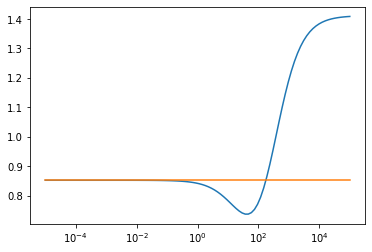

In [101]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_error, baseline_error])
ax.plot(baseline_error)
ax.set_xscale("log")


In [136]:
#index de l'erreur la plus petite
errorsIndex = np.argmin(errors)
#valeur de l'erreur la plus petite 
errors[errorsIndex]
#coefficient alpha associé 
alphas[errorsIndex]

36.783797718286344

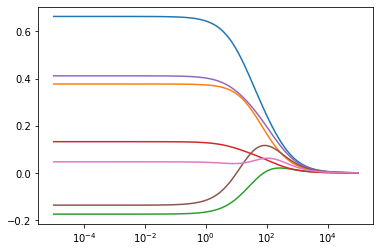

In [107]:
## chemin de regularisation 
chemin = plt.gca()
chemin.plot(alphas, coefs)
chemin.set_xscale("log")

In [108]:
#beta est en ordonnée et la solution de la regularisation est quand beta = 0

### Modèle Partimonieux pouvant mettre la ponderation de certaines varibles à zero
Lasso Least Absolute Shrinkage and Selection operator

In [147]:
lasso = linear_model.Lasso()

# paramètre de regularisation 
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
coefs = []
errors = []

for a in alphas: 
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, (np.mean(lasso.predict(X_test) - y_test)**2)])
    

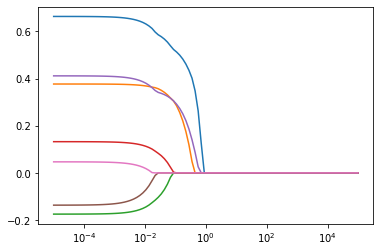

In [148]:
## chemin de regularisation 
chemin = plt.gca()
chemin.plot(alphas, coefs)
chemin.set_xscale("log")

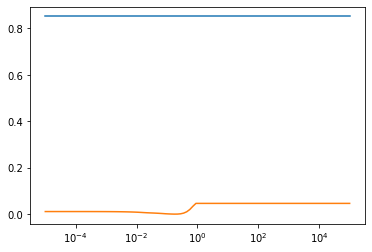

In [149]:
graph = plt.gca()
graph.plot(alphas, errors)
graph.set_xscale("log")